In [1]:
import requests

In [2]:
try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x, total, unit: x  # If tqdm doesn't exist, replace it with a function that does nothing
    print('**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****')

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

traverse_dict(download_dict)

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)


>  2


Please select a download option:
1) NumPy data format (.npz)


>  1


100%|███████████████████████████████████████████████████████████████████████████████████| 64569/64569 [19:36<00:00, 54.88KB/s]


100%|██████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 219.29KB/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 10715/10715 [00:10<00:00, 1019.10KB/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 92.77KB/s]

All dataset files downloaded!


Step1: Load the Dataset

In [6]:
import numpy as np

In [12]:
test_images = np.load("C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-test-imgs.npz")['arr_0']
print(f"Test images shape: {test_images.shape}")

Test images shape: (38547, 28, 28)


In [13]:
test_labels = np.load("C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-test-labels.npz")['arr_0']
print(f"Test labels shape: {test_labels.shape}")

Test labels shape: (38547,)


In [14]:
train_images = np.load("C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-train-imgs.npz")['arr_0']
print(f"Train images shape: {train_images.shape}")

Train images shape: (232365, 28, 28)


In [15]:
train_labels = np.load("C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-train-labels.npz")['arr_0']
print(f"Train labels shape: {train_labels.shape}")

Train labels shape: (232365,)


Step2: Preprocess the Data

In [36]:
import torch
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import DataLoader, TensorDataset

Normalisation: Scaling pixel values to the range[0,1].

In [23]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

One-hot Encoding: Converting the labels to one-hot encoded vectors.

In [25]:
# Define a function for one-hot encoding using PyTorch
def to_one_hot(labels, num_classes):
    return torch.eye(num_classes)[labels]

In [27]:
# Convert labels to PyTorch tensors
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

In [28]:
# One-hot encode the labels
num_classes = 49
train_labels_onehot = to_one_hot(train_labels_tensor, num_classes)
test_labels_onehot = to_one_hot(test_labels_tensor, num_classes)

In [29]:
# Convert images to PyTorch tensors and add a channel dimension
train_images_tensor = torch.tensor(train_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
test_images_tensor = torch.tensor(test_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension

In [37]:
# Create TensorDataset and DataLoader
train_dataset = TensorDataset(train_images_tensor, train_labels_onehot)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [38]:
test_dataset = TensorDataset(test_images_tensor, test_labels_onehot)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [30]:
print(f"Train images tensor shape: {train_images_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_onehot.shape}")
print(f"Test images tensor shape: {test_images_tensor.shape}")
print(f"Test labels tensor shape: {test_labels_onehot.shape}")

Train images tensor shape: torch.Size([232365, 1, 28, 28])
Train labels tensor shape: torch.Size([232365, 49])
Test images tensor shape: torch.Size([38547, 1, 28, 28])
Test labels tensor shape: torch.Size([38547, 49])


Step3: Implement the C-VAE Model

In [44]:
import torch.nn as nn
import torch.nn.functional as F

class CVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, num_classes):
        super(CVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + num_classes, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim * 2)  # for mean and log variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )
        self.latent_dim = latent_dim

    def encode(self, x, labels):
        x = torch.cat((x, labels), dim=1)
        h = self.encoder(x)
        mu, log_var = torch.chunk(h, 2, dim=1)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, labels):
        z = torch.cat((z, labels), dim=1)
        return self.decoder(z)

    def forward(self, x, labels):
        mu, log_var = self.encode(x, labels)
        z = self.reparameterize(mu, log_var)
        return self.decode(z, labels), mu, log_var

# Instantiate the model
input_dim = 28 * 28
latent_dim = 20
num_classes = 49

cvae = CVAE(input_dim, latent_dim, num_classes)




In [45]:
# Define loss function and optimizer
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

optimizer = torch.optim.Adam(cvae.parameters(), lr=1e-3)


In [46]:

# Training loop
num_epochs = 10  # Adjust the number of epochs as needed

for epoch in range(num_epochs):
    cvae.train()
    train_loss = 0
    for data, labels in train_loader:
        data = data.view(-1, 28 * 28)
        optimizer.zero_grad()
        recon_batch, mu, log_var = cvae(data, labels)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset)}')

Epoch 1, Loss: 1.3317353671155197
Epoch 2, Loss: 0.03031778157602565
Epoch 3, Loss: 0.0294548522530056
Epoch 4, Loss: 0.029196554202162123
Epoch 5, Loss: 0.029025710264441555
Epoch 6, Loss: 0.028960623375977986
Epoch 7, Loss: 0.028943588234857903
Epoch 8, Loss: 0.028938769635464053
Epoch 9, Loss: 0.028935935065162125
Epoch 10, Loss: 0.028934330460362048


In [61]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the dataset
train_images = np.load('C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-train-imgs.npz')['arr_0']
train_labels = np.load('C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-train-labels.npz')['arr_0']
test_images = np.load('C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-test-imgs.npz')['arr_0']
test_labels = np.load('C:/Users/rosmi/OneDrive/Desktop/Probs Model n Inference/k49-test-labels.npz')['arr_0']

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0



In [62]:

# Define a function for one-hot encoding using PyTorch
def to_one_hot(labels, num_classes):
    return torch.eye(num_classes)[labels]

# Convert labels to PyTorch tensors
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# One-hot encode the labels
num_classes = 49
train_labels_onehot = to_one_hot(train_labels_tensor, num_classes)
test_labels_onehot = to_one_hot(test_labels_tensor, num_classes)

# Convert images to PyTorch tensors and add a channel dimension
train_images_tensor = torch.tensor(train_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
test_images_tensor = torch.tensor(test_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension



In [63]:
# Define the C-VAE model
class CVAE(nn.Module):
    def __init__(self, image_size, label_size, hidden_dim, latent_dim):
        super(CVAE, self).__init__()
        self.image_size = image_size
        self.label_size = label_size
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        
        self.encoder_fc1 = nn.Linear(image_size + label_size, hidden_dim)
        self.encoder_fc2_mean = nn.Linear(hidden_dim, latent_dim)
        self.encoder_fc2_logvar = nn.Linear(hidden_dim, latent_dim)
        
        self.decoder_fc1 = nn.Linear(latent_dim + label_size, hidden_dim)
        self.decoder_fc2 = nn.Linear(hidden_dim, image_size)
    
    def encode(self, x, c):
        h = F.relu(self.encoder_fc1(torch.cat([x, c], dim=1)))
        return self.encoder_fc2_mean(h), self.encoder_fc2_logvar(h)
    
    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std
    
    def decode(self, z, c):
        h = F.relu(self.decoder_fc1(torch.cat([z, c], dim=1)))
        return torch.sigmoid(self.decoder_fc2(h))
    
    def forward(self, x, c):
        mean, logvar = self.encode(x.view(-1, self.image_size), c)
        z = self.reparameterize(mean, logvar)
        return self.decode(z, c), mean, logvar

# Create an instance of the C-VAE model
image_size = 28 * 28  # 28x28 images
label_size = 49  # 49 classes
hidden_dim = 256
latent_dim = 64
cvae = CVAE(image_size, label_size, hidden_dim, latent_dim)

# Define the loss function
def loss_function(recon_x, x, mean, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return BCE + KLD

optimizer = optim.Adam(cvae.parameters(), lr=1e-3)


In [64]:

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    cvae.train()
    train_loss = 0
    for i in range(len(train_images_tensor)):
        img = train_images_tensor[i].view(-1, 28*28)
        lbl = train_labels_onehot[i].view(1, -1)
        
        optimizer.zero_grad()
        recon_batch, mean, logvar = cvae(img, lbl)
        loss = loss_function(recon_batch, img, mean, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_images_tensor)}')



Epoch 1, Loss: 221.85297518069325
Epoch 2, Loss: 216.19826013070383
Epoch 3, Loss: 216.59968723901832
Epoch 4, Loss: 216.7093247339575
Epoch 5, Loss: 216.58750019119043
Epoch 6, Loss: 216.412949623287
Epoch 7, Loss: 215.94104459332166
Epoch 8, Loss: 215.76290262107494
Epoch 9, Loss: 215.61836529382626
Epoch 10, Loss: 215.55167309578388


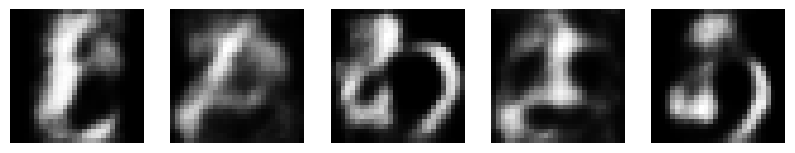

In [ ]:
# Function to generate new images
def generate_images(cvae, num_samples, label):
    cvae.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim)
        labels = torch.eye(num_classes)[torch.tensor([label] * num_samples)]
        generated_images = cvae.decode(z, labels).view(-1, 1, 28, 28)
    return generated_images

# Generate and visualize new images
def show_generated_images(images, num_images):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i, 0, :, :], cmap='gray')
        plt.axis('off')
    plt.show()

# Generate 5 new images for a specific class (e.g., class 0)
generated_images = generate_images(cvae, num_samples=5, label=0)
show_generated_images(generated_images, num_images=5)

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt

class CGANGenerator(nn.Module):
    def __init__(self, z_dim, label_dim, img_dim):
        super(CGANGenerator, self).__init__()
        self.label_emb = nn.Embedding(label_dim, label_dim)
        self.model = nn.Sequential(
            nn.Linear(z_dim + label_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512, momentum=0.8),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024, momentum=0.8),
            nn.ReLU(),
            nn.Linear(1024, img_dim),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        c = self.label_emb(labels)
        x = torch.cat([noise, c], 1)
        img = self.model(x)
        img = img.view(img.size(0), 1, 28, 28)
        return img


ModuleNotFoundError: No module named 'torchvision'